Install kaggle Library

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -dtechsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 98% 417M/427M [00:02<00:00, 245MB/s]
100% 427M/427M [00:02<00:00, 215MB/s]


Extract the dataset

In [4]:
import zipfile
with zipfile.ZipFile("waste-classification-data.zip",'r') as zip_ref:
  zip_ref.extractall("waste_classification")


Importing Necessary Libraries

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report

Loading Dataset

In [6]:
dataset_path='waste_classification/DATASET'
train_dir=os.path.join(dataset_path,'TRAIN')
test_dir=os.path.join(dataset_path,'TEST')


Data Preprocessing

In [7]:
#Image data generation for training and testing
train_datagen=ImageDataGenerator(rescale=1.0/255,#Normalize pixel values
                                 rotation_range=30,#Random Rotations
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                 )
test_datagen=ImageDataGenerator(rescale=1.0/255)
#Load the data
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='binary',
                                           shuffle=False
                                           )


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Build the CNN Model

In [8]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),  #Prevent Overfitting
    Dense(1,activation='sigmoid')#Binary classification

])

In [9]:
#Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [10]:
history=model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,#you can adjust based on performance
    steps_per_epoch=train_data.samples//train_data.batch_size,
    validation_steps=test_data.samples//test_data.batch_size
)

Epoch 1/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 151s 205ms/step - accuracy: 0.7651 - loss: 0.5012 - val_accuracy: 0.8658 - val_loss: 0.3480
Epoch 2/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9062 - loss: 0.3299 - val_accuracy: 0.8706 - val_loss: 0.3442
Epoch 3/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 142s 201ms/step - accuracy: 0.8173 - loss: 0.4186 - val_accuracy: 0.8614 - val_loss: 0.3535
Epoch 4/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8438 - loss: 0.3080 - val_accuracy: 0.8534 - val_loss: 0.3628
Epoch 5/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 202s 208ms/step - accuracy: 0.8278 - loss: 0.4006 - val_accuracy: 0.8638 - val_loss: 0.3520
Epoch 6/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8125 - loss: 0.4551 - val_accuracy: 0.8634 - val_loss: 0.3503
Epoch 7/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 142s 201ms/step - accuracy: 0.8395 - loss: 0.3792 - val_accuracy: 0.8666 - val_loss: 0.3392
Epoch 8/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.2288 - 

Evaluate the Model

In [11]:
#Evaluate on test data
loss,accuracy=model.evaluate(test_data)
print(f"Test Accuracy:{accuracy*100:.2f}%")
#Classification Report and Configuration Matrix
y_true=test_data.classes
y_pred=(model.predict(test_data)>0.5).astype('int32')
print("Classification Report:\n",classification_report(y_true,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_true,y_pred))

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9122 - loss: 0.2572
Test Accuracy:88.50%
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1401
           1       0.88      0.86      0.87      1112

    accuracy                           0.88      2513
   macro avg       0.88      0.88      0.88      2513
weighted avg       0.88      0.88      0.88      2513

Confusion Matrix:
 [[1268  133]
 [ 156  956]]


Visualize Results

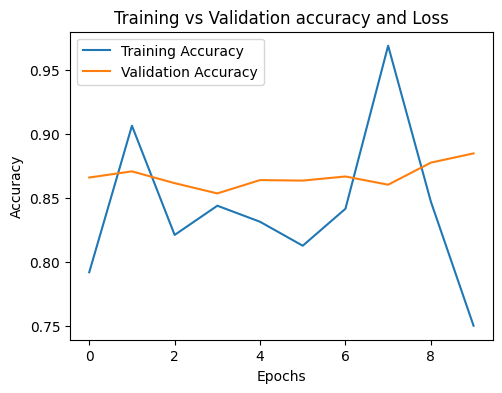

In [17]:
#plot training and validation accuracy/loss
plt.figure(figsize=(12,4))

#Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.title("Training vs Validation accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Save the Model

In [13]:
#Save the trained model
model.save('waste_classification_model.keras')

Predict on New Images

In [14]:
from tensorflow.keras.preprocessing import image
#Load and preprocess a new image
img_path="/content/waste_classification/DATASET/TEST/R/R_10008.jpg"
img=image.load_img(img_path,target_size=(150,150))
img_array=image.img_to_array(img)/255.0
img_array=np.expand_dims(img_array,axis=0)


#Predict the class
prediction=model.predict(img_array)
if prediction>0.5:
  print("Recyclable Waste")
else:
  print("Organic Waste")





1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
Recyclable Waste
